# Air Quality analysis in India

In [39]:
# Importing Libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing dataset.

df=pd.read_csv('data.csv',encoding = "ISO-8859-1",low_memory=False)

In [3]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,01-02-1990
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,01-02-1990
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,01-02-1990
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,01-03-1990
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,01-03-1990


## Data Description:

*  **1.stn_code :** Station code. A code is given to each station that recorded the data.
*  **2.sampling_date:** The date when the data was recorded.
*  **3.state:** It represents the states whose air quality data is measured.
*  **4.location:** It represents the city whose air quality data is measured.
*  **5.agency:** Name of the agency that measured the data.
*  **6.type:** The type of area where the measurement was made.
*  **7.so2:** The amount of Sulphur Dioxide measured.
*  **8.no2:** The amount of Nitrogen Dioxide measured
*  **9.rspm:** Respirable Suspended Particulate Matter measured.
*  **10.spm:** Suspended Particulate Matter measured.
*  **11.location_monitoring_station:** It indicates the location of the monitoring area.
*  **12.pm2_5:** It represents the value of particulate matter measured.
*  **13.date:** It represents the date of recording (It is a cleaner version of ‘sampling_date’ feature)

In [4]:
# Analysing the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [5]:
df.describe(include='all')

# In describe we can see lots of null values present in the dataset.

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
count,291665,435739,435742,435739,286261,430349,401096.000000,419509.000000,395520.000000,198355.000000,408251,9314.000000,435735
unique,745,5071,37,304,64,10,NaN,NaN,NaN,NaN,991,NaN,5067
top,193,19-03-2015,Maharashtra,Guwahati,Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",NaN,NaN,NaN,NaN,Regional Office,NaN,19-03-2015
freq,1428,253,60384,9984,27857,179014,NaN,NaN,NaN,NaN,6261,NaN,253
mean,NaN,NaN,NaN,NaN,NaN,NaN,10.829414,25.809623,108.832784,220.783480,NaN,40.791467,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,11.177187,18.503086,74.872430,151.395457,NaN,30.832525,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,3.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,14.000000,56.000000,111.000000,NaN,24.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,22.000000,90.000000,187.000000,NaN,32.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,13.700000,32.200000,142.000000,296.000000,NaN,46.000000,NaN


## Data modification

In [6]:
# As we have the same values like Residential, Industries, Sensitive we can replace 10 values into 3 values.

df['type'].replace('Residential, Rural and other Areas','Residential',inplace = True)
df['type'].replace('Residential and others','Residential',inplace = True)
df['type'].replace('Industrial Areas','Industrial',inplace = True)
df['type'].replace('Industrial Area','Industrial',inplace = True)
df['type'].replace('Sensitive Area','Sensitive',inplace = True)
df['type'].replace('Sensitive Areas','Sensitive',inplace = True)


## Handling null values

In [7]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [8]:
df.shape

(435742, 13)

In [9]:
df.nunique()

stn_code                        745
sampling_date                  5071
state                            37
location                        304
agency                           64
type                              4
so2                            4197
no2                            6864
rspm                           6065
spm                            6668
location_monitoring_station     991
pm2_5                           433
date                           5067
dtype: int64

In [10]:
# As we have the lowest null value in date, location and sampling_date we can fill the value with the forward filling method

# Using filling method is not applicable for date column's but in our dataset we have dublicate values in date column also

df['date'].fillna(method='ffill',inplace=True)

df['location'].fillna(method='ffill',inplace=True)

df['sampling_date'].fillna(method='ffill',inplace=True)

df.isnull().sum()



stn_code                       144077
sampling_date                       0
state                               0
location                            0
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                0
dtype: int64

## Data filteration 

* In rspm and spm column we have to group the null values using the various columns in the dataset that related with this columns like:

* 1.location.
* 2.type.
* 3.date.
* 4.state.

* From this we can remove the null values by using the related columns.

   

In [11]:
print(df.rspm.isnull().sum())
print(df.spm.isnull().sum())

40222
237387


In [12]:
df1 = dict(list(df.groupby(['location','type'])))
data = pd.DataFrame()
for key in df1:
    df2 = df1[key].sort_values('date')
    df2['rspm'].fillna(method = 'ffill',inplace = True)
    df2['spm'].fillna(method = 'ffill',inplace= True)
    data = pd.concat([data,df2])

In [13]:
df1 = dict(list(data.groupby(['location','type'])))
data1 = pd.DataFrame()
for key in df1:
    df2 = df1[key].sort_values('date')
    df2['rspm'].fillna(method = 'bfill',inplace = True)
    df2['spm'].fillna(method = 'bfill',inplace= True)
    data1 = pd.concat([data1,df2])
    

In [14]:
print(data1.rspm.isnull().sum())
print(data1.spm.isnull().sum())

4102
47909


In [15]:
df1 = dict(list(data1.groupby(['state','type'])))
data2 = pd.DataFrame()
for key in df1:
    df2 = df1[key]
    df2['rspm'].fillna(df2['rspm'].median(),inplace = True)
    df2['spm'].fillna(df2['spm'].median(),inplace= True)
    data2 = pd.concat([data2,df2])

In [16]:
print(data2.rspm.isnull().sum())
print(data2.spm.isnull().sum())

182
1972


In [17]:
df1 = dict(list(data2.groupby('type')))
data3 = pd.DataFrame()
for key in df1:
    df2 = df1[key]
    df2['rspm'].fillna(df2['rspm'].median(),inplace = True)
    df2['spm'].fillna(df2['spm'].median(),inplace= True)
    data3 = pd.concat([data3,df2])

In [18]:
print(data3.rspm.isnull().sum())
print(data3.spm.isnull().sum())

0
1304


In [19]:
data3['spm'].fillna(method='ffill',inplace=True)


In [20]:
data3.isnull().sum()

stn_code                       144074
sampling_date                       0
state                               0
location                            0
agency                         149478
type                                0
so2                             34188
no2                             15848
rspm                                0
spm                                 0
location_monitoring_station     22098
pm2_5                          421035
date                                0
dtype: int64

## Data cleaning

* As we saw in the filtered data so2, no2, pm2_5 and location_monitoring_station having large null values.

* **so2  :** For so2 we can fill it through the forward filling method.

* **no2  :** For no2 we can also fill it through the forward filling method.

* **pm2_5:** In pm2_5 column having continues null values so we use the forward and backward filling method.

* **location_monitoring_station:** In this column also having continues null vlaues so we can use the forward and backward filling method.

In [21]:
data3['so2'].fillna(method='ffill',inplace=True)

data3['no2'].fillna(method='ffill',inplace=True)

data3['pm2_5'].fillna(method='ffill',inplace=True)

data3['pm2_5'].fillna(method='bfill',inplace=True)

data3['location_monitoring_station'].fillna(method='ffill',inplace=True)

data3['location_monitoring_station'].fillna(method='bfill',inplace=True)


## Dropping unnessary column's

* stn_code and agency is irrelevent to our analysis so we can drop the columns.

In [22]:
data3.drop(columns=['stn_code','agency'],inplace = True)


In [23]:
data3.head()

,sampling_date,state,location,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
31,January - M011991,Andhra Pradesh,Hyderabad,Industrial,28.7,16.2,143.7,77.0,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",29.0,01-01-1991
74,January - M011992,Andhra Pradesh,Hyderabad,Industrial,24.5,11.5,143.7,118.0,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",29.0,01-01-1992
153,January - M011993,Andhra Pradesh,Hyderabad,Industrial,9.9,11.6,143.7,118.0,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",29.0,01-01-1993
191,January - M011994,Andhra Pradesh,Hyderabad,Industrial,9.7,9.0,143.7,98.0,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",29.0,01-01-1994
271,January_1995,Andhra Pradesh,Hyderabad,Industrial,10.1,11.1,143.7,39.0,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",29.0,01-01-1995


In [24]:
data3.shape

(430349, 11)

In [25]:
# checking wheather null value is present or not
data3.isnull().sum()

sampling_date                  0
state                          0
location                       0
type                           0
so2                            0
no2                            0
rspm                           0
spm                            0
location_monitoring_station    0
pm2_5                          0
date                           0
dtype: int64

## Index resting

In [26]:
data3.reset_index(inplace=True)


In [28]:
data3.drop(columns=['index'],inplace=True)

In [29]:
data3.head()

,sampling_date,state,location,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,January - M011991,Andhra Pradesh,Hyderabad,Industrial,28.7,16.2,143.7,77.0,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",29.0,01-01-1991
1,January - M011992,Andhra Pradesh,Hyderabad,Industrial,24.5,11.5,143.7,118.0,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",29.0,01-01-1992
2,January - M011993,Andhra Pradesh,Hyderabad,Industrial,9.9,11.6,143.7,118.0,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",29.0,01-01-1993
3,January - M011994,Andhra Pradesh,Hyderabad,Industrial,9.7,9.0,143.7,98.0,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",29.0,01-01-1994
4,January_1995,Andhra Pradesh,Hyderabad,Industrial,10.1,11.1,143.7,39.0,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",29.0,01-01-1995


# Quesion part

# 1.How bad is india air pollution with type.

* India's air pollution is caused by a variety of sources, including industrial activity, transportation, and residential sources such as cooking and heating with solid fuels. Industrial pollution is a major contributor to air pollution in many parts of India, particularly in urban areas with large concentrations of factories and other industrial facilities. 

 * Some of the major industrial sources of pollution include power plants, chemical plants, and factories that produce metals, textiles, and other products. Residential sources of pollution, such as the use of solid fuels like wood and charcoal for cooking and heating, also contribute to poor air quality in many parts of the country. The combination of these various sources has made air pollution a significant public health concern in India, with serious implications for respiratory health, cardiovascular disease, and other illnesses.

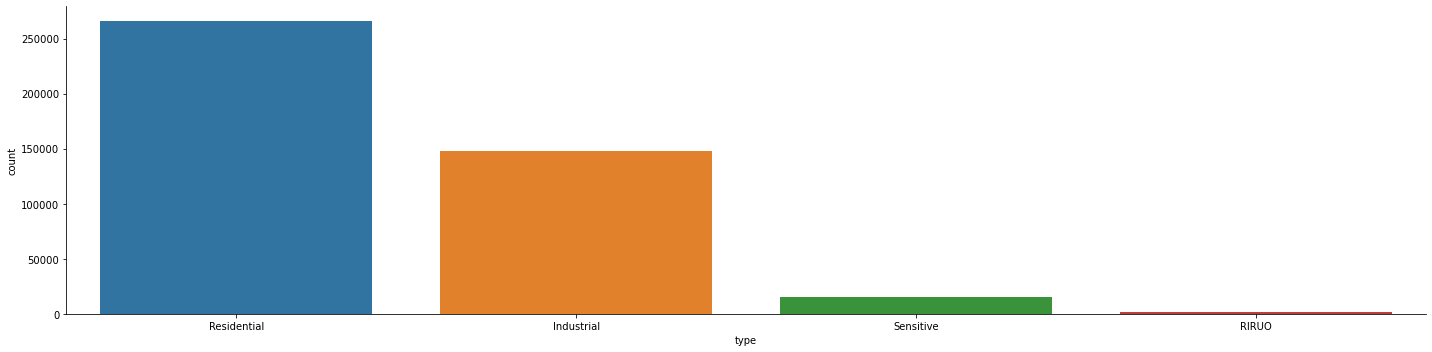

In [40]:
sns.catplot(x = "type", kind = "count",  data = df, height=5, aspect = 4)


# 2.what are the source of inida's polluted air

* NO2 and SO2 are two common air pollutants that are often analyzed in air quality assessments.

* NO2 (Nitrogen Dioxide) is a reddish-brown gas that forms when nitrogen oxide (NO) reacts with oxygen in the air. It is primarily produced by combustion processes such as fossil fuel burning in vehicles, power plants, and industrial facilities. High levels of NO2 can irritate the respiratory system, and prolonged exposure to NO2 can cause respiratory problems such as bronchitis and asthma.

* SO2 (Sulfur Dioxide) is a colorless gas with a sharp, pungent odor that is produced when sulfur-containing fuels such as coal and oil are burned. It is a major contributor to acid rain and can cause respiratory problems and other health issues when present in high concentrations. SO2 is also a precursor to fine particulate matter (PM2.5), which is a major air pollutant with significant negative impacts on public health.

<AxesSubplot:xlabel='type'>

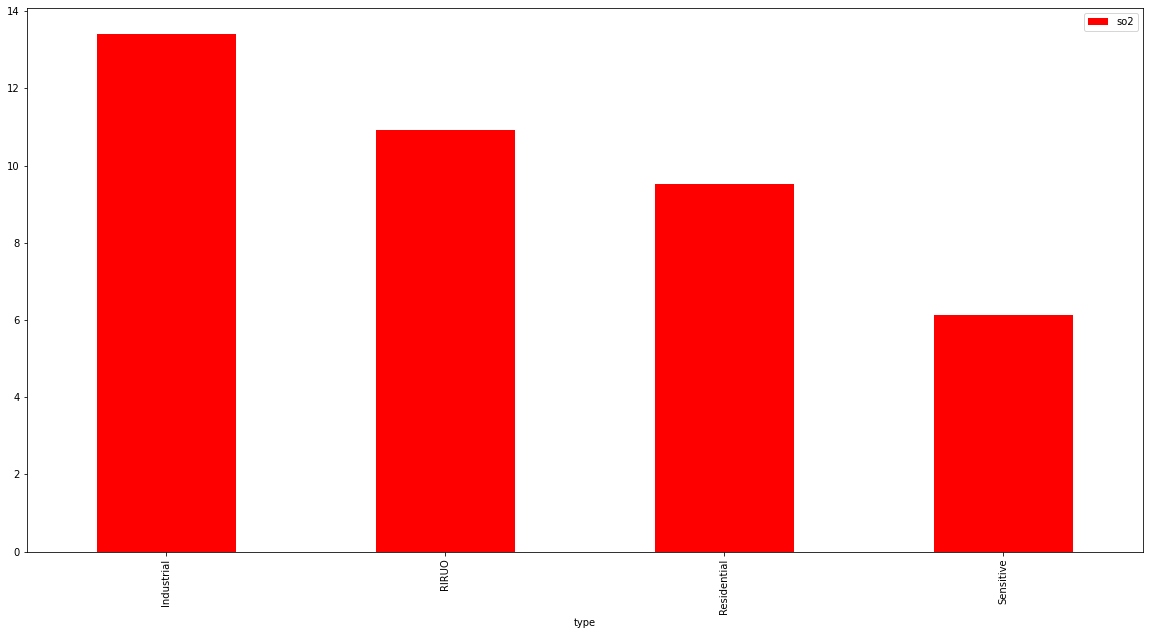

In [41]:
grp = df.groupby(["type"]).mean()["so2"].to_frame()
grp.plot.bar(figsize = (20,10), color={"red"})

<AxesSubplot:xlabel='type'>

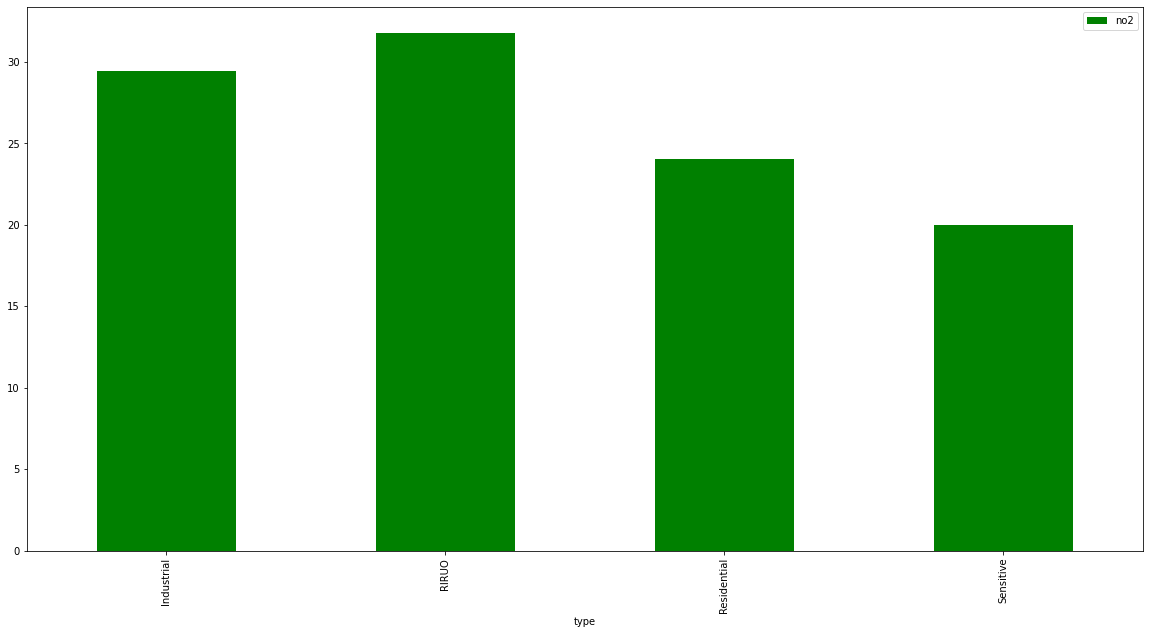

In [42]:
grp = df.groupby(["type"]).mean()["no2"].to_frame()
grp.plot.bar(figsize = (20,10), color={"green"})

# 3. which city will improve the AQI
* AQI stands for Air Quality Index. It is a measure of how polluted the air is in a particular location, and is used by government agencies and health organizations to inform the public about the health risks associated with air pollution.

* The AQI is based on measurements of various pollutants in the air, including particulate matter, ozone, nitrogen dioxide, and sulfur dioxide. These measurements are combined into a single index that ranges from 0 to 500 or higher, with higher values indicating greater levels of air pollution and associated health risks.

<AxesSubplot:xlabel='state'>

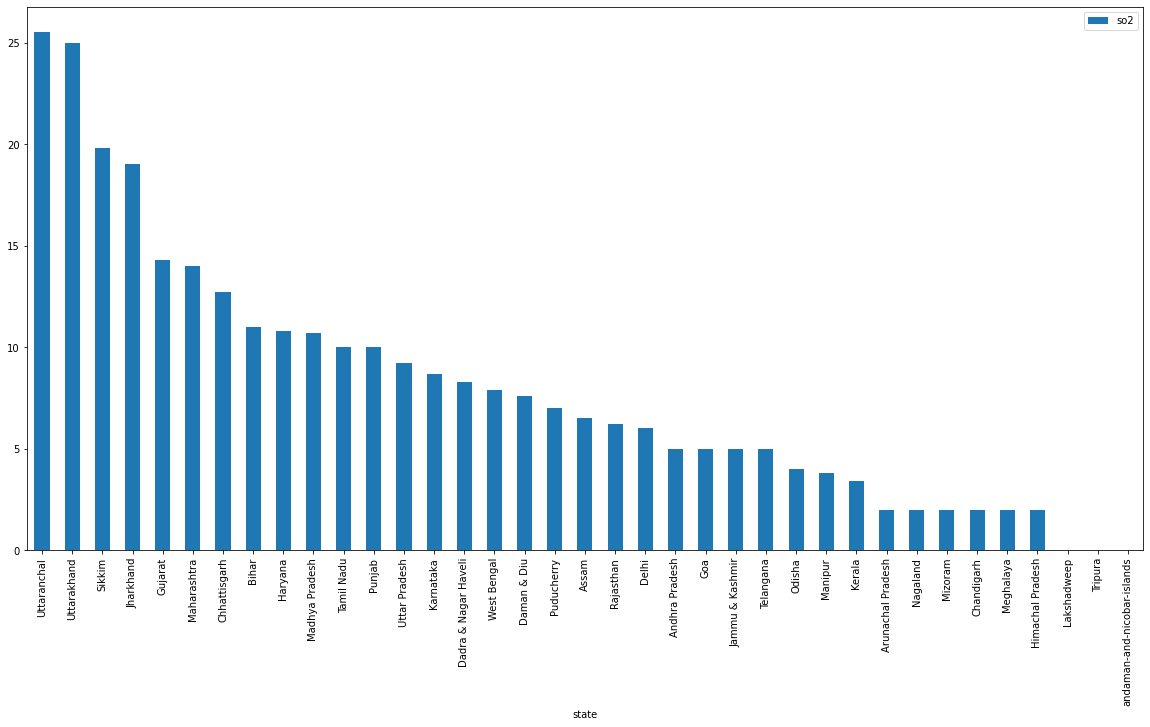

In [43]:
df[['so2', 'state']].groupby(['state']).median().sort_values("so2", ascending = False).plot.bar(figsize=(20,10))

<AxesSubplot:xlabel='state'>

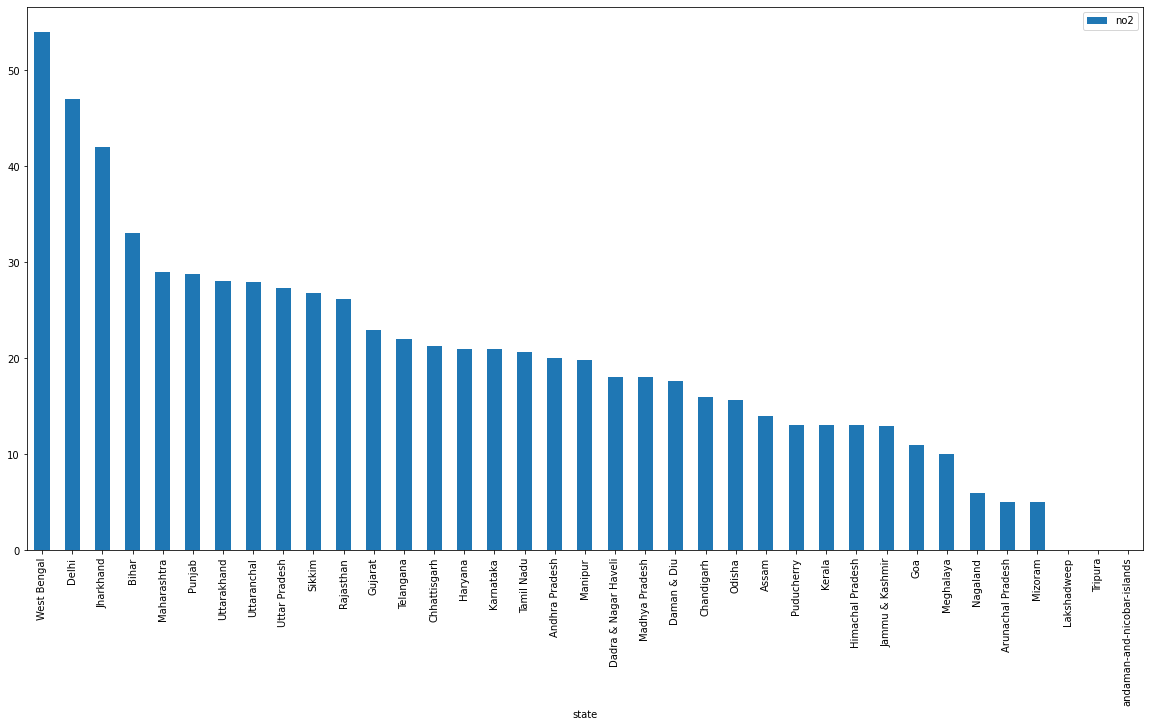

In [47]:
df[['no2', 'state']].groupby(['state']).median().sort_values("no2", ascending = False).plot.bar(figsize=(20,10))

<AxesSubplot:xlabel='state'>

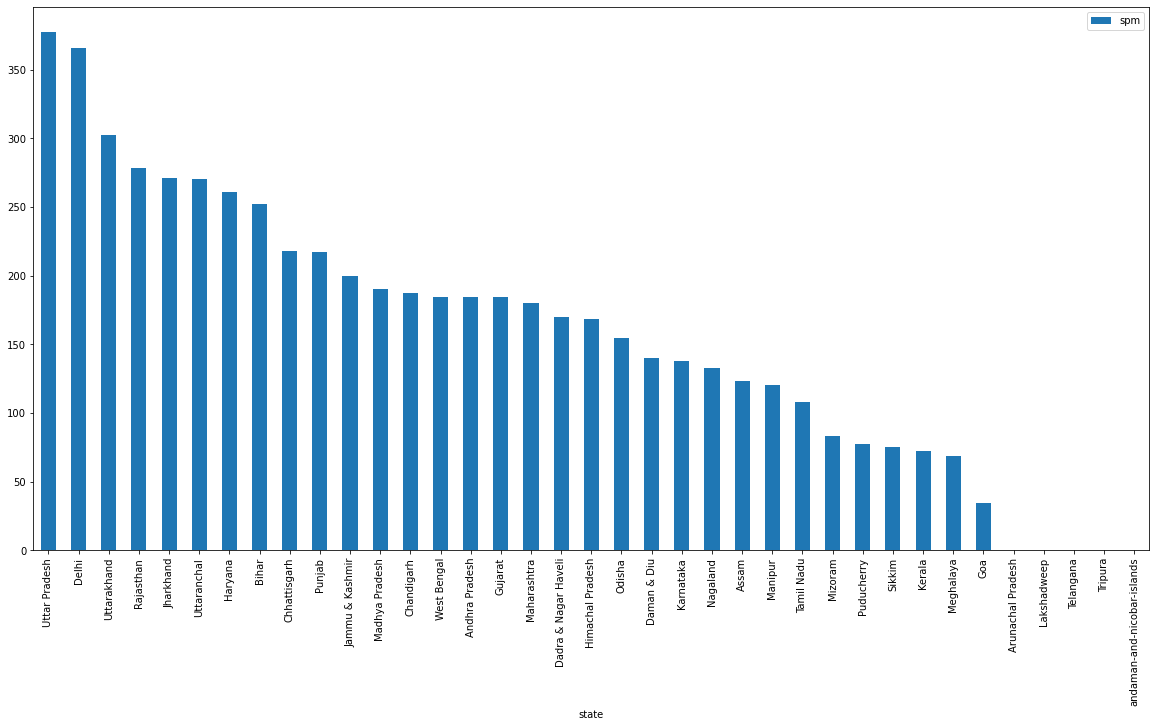

In [48]:
df[['spm', 'state']].groupby(['state']).median().sort_values("spm", ascending = False).plot.bar(figsize=(20,10))

## 4. what effects does the poor air quality have on health



*  1.Cardiovascular Diseases: Air pollution has been linked to an increased risk of cardiovascular diseases such as stroke, heart disease, and heart failure. Exposure to air pollution can cause inflammation in the body, which can lead to the development of these diseases.

* 2.Cancer: Exposure to certain types of air pollution, such as diesel exhaust and airborne particles, has been linked to an increased risk of cancer, including lung cancer.

* 3.Reproductive and Developmental Problems: Exposure to air pollution can have negative effects on reproductive and developmental health. For example, exposure to air pollution during pregnancy has been linked to low birth weight, premature birth, and developmental problems.

* 4.Neurological Problems: Air pollution can have negative effects on the brain and nervous system, and has been linked to cognitive impairment and an increased risk of dementia.

* 5.Allergies: Poor air quality can worsen allergies and increase the risk of developing new allergies.

# Conclusion

* From the above analysis, we see that the majorly affected states in India by air pollution belong to the northern region.
* States like Delhi, Punjab, Uttar Pradesh, Haryana are heavily polluted and require immediate action.
* We also saw that even if a state had a high level of pollutants, there were some regions in the states that were not polluted.

* We also see from statistical analysis that the states with high rspm concentrations also have high spm concentrations.